In [7]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from pandas.plotting import table 
import seaborn as sns 

In [2]:
path = r".\IJCNN_Experiments\mnist-4-0-tr400\svm"

In [12]:
df = pd.DataFrame()

for file_name in os.listdir(path):
    h = file_name.split("_")[-1].replace(".csv", "")
    if h in ["flip", "k15", "linear"]:
        continue
    input_file = pd.read_csv(path + "\\" + file_name, delimiter=",")
    input_file = input_file.assign(h=pd.Series([h]*input_file.shape[0]))
    df = df.append(input_file)

C:\Users\atakan\AppData\Local\Temp\ipykernel_8748\1711259797.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(input_file)
C:\Users\atakan\AppData\Local\Temp\ipykernel_8748\1711259797.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(input_file)
C:\Users\atakan\AppData\Local\Temp\ipykernel_8748\1711259797.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(input_file)
C:\Users\atakan\AppData\Local\Temp\ipykernel_8748\1711259797.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(input_file)
C:\Users\atakan\AppData\Local\Temp\ipykernel_8748\1711259797.py:9: FutureWarning: Th

In [13]:
df["test_acc "] = df["test_acc "].astype(float)

In [17]:
r = pd.pivot_table(df[df["c "] == 1], values="test_acc ", index="h", columns="poison_fraction ")

In [18]:
r

poison_fraction,0.000000,0.047619,0.065421,0.084668,0.103139,0.120879,0.137931,0.154334,0.170124,0.185336,0.200000
h,,,,,,,,,,,
0.01,0.998,0.976,0.968,0.976,0.971,0.972,0.969,0.957,0.959,0.963,0.963
0.1,0.998,0.976,0.968,0.976,0.971,0.972,0.969,0.957,0.959,0.963,0.963
0.2,0.998,0.968,0.947,0.939,0.955,0.934,0.929,0.921,0.920,0.893,0.915
0.3,0.998,0.913,0.917,0.852,0.817,0.801,0.756,0.753,0.707,0.724,0.642
0.4,0.998,0.914,0.919,0.852,0.822,0.805,0.759,0.749,0.703,0.724,0.639
0.5,0.998,0.920,0.917,0.851,0.826,0.793,0.760,0.748,0.709,0.718,0.640
0.6,0.998,0.924,0.917,0.844,0.838,0.788,0.750,0.746,0.699,0.715,0.640
0.7,0.998,0.926,0.917,0.842,0.839,0.788,0.748,0.749,0.698,0.709,0.648
0.8,0.998,0.926,0.917,0.841,0.839,0.787,0.742,0.750,0.694,0.707,0.648


In [26]:
sns.set(rc={"figure.figsize":(15, 10)})

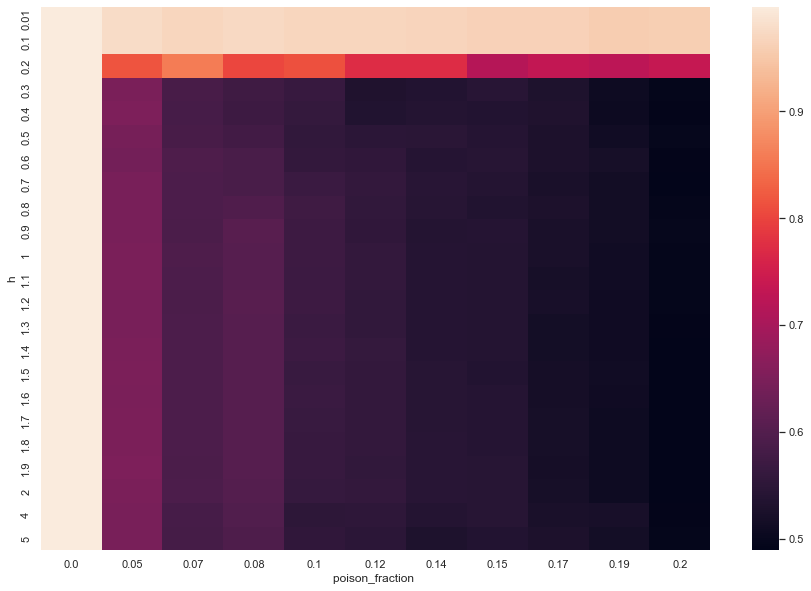

In [31]:
df["poison_fraction "] = df["poison_fraction "].round(2)

heatmap = sns.heatmap(pd.pivot_table(df[df["c "] == 100], 
                           values="test_acc ", 
                           index="h", 
                           columns=df[df["c "] == 100]["poison_fraction "]))
heatmap.figure.savefig(f"heatmap-kde-bandwith-svm-linear-c100.png")

In [ ]:
sns.heatmap(pd.pivot_table(all_df[all_df["c "] == 1], 
                           values="test_acc ", 
                           index="poison_fraction ", 
                           columns=all_df[all_df["c "] == 1]["gamma"]))

In [32]:
r.style.highlight_min(color = 'yellow', axis = 0)

poison_fraction,0.000000,0.047619,0.065421,0.084668,0.103139,0.120879,0.137931,0.154334,0.170124,0.185336,0.200000
h,,,,,,,,,,,
0.01,0.998000,0.976000,0.968000,0.976000,0.971000,0.972000,0.969000,0.957000,0.959000,0.963000,0.963000
0.1,0.998000,0.976000,0.968000,0.976000,0.971000,0.972000,0.969000,0.957000,0.959000,0.963000,0.963000
0.2,0.998000,0.968000,0.947000,0.939000,0.955000,0.934000,0.929000,0.921000,0.920000,0.893000,0.915000
0.3,0.998000,0.913000,0.917000,0.852000,0.817000,0.801000,0.756000,0.753000,0.707000,0.724000,0.642000
0.4,0.998000,0.914000,0.919000,0.852000,0.822000,0.805000,0.759000,0.749000,0.703000,0.724000,0.639000
0.5,0.998000,0.920000,0.917000,0.851000,0.826000,0.793000,0.760000,0.748000,0.709000,0.718000,0.640000
0.6,0.998000,0.924000,0.917000,0.844000,0.838000,0.788000,0.750000,0.746000,0.699000,0.715000,0.640000
0.7,0.998000,0.926000,0.917000,0.842000,0.839000,0.788000,0.748000,0.749000,0.698000,0.709000,0.648000
0.8,0.998000,0.926000,0.917000,0.841000,0.839000,0.787000,0.742000,0.750000,0.694000,0.707000,0.648000


In [77]:
a = []

for h, exp in results.items():
#     plt.plot(exp["test_acc "])
#     print(h, exp["test_acc "])
    if h == "1":
        print(exp)
        original = min(exp["test_acc "])
    
    a.append([h, min(exp["test_acc "])])

a = np.asarray(a, dtype=float)

         algorithm   lb   tr_size   n_poison   poison_fraction   c   val_acc   \
0   beta_poison_k15    1       400          0          0.000000   1     0.997   
1   beta_poison_k15    1       400         20          0.047619   1     0.996   
2   beta_poison_k15    1       400         28          0.065421   1     0.997   
3   beta_poison_k15    1       400         37          0.084668   1     0.995   
4   beta_poison_k15    1       400         46          0.103139   1     0.996   
5   beta_poison_k15    1       400         55          0.120879   1     0.986   
6   beta_poison_k15    1       400         64          0.137931   1     0.994   
7   beta_poison_k15    1       400         73          0.154334   1     0.997   
8   beta_poison_k15    1       400         82          0.170124   1     0.996   
9   beta_poison_k15    1       400         91          0.185336   1     0.997   
10  beta_poison_k15    1       400        100          0.200000   1     0.993   

    test_acc         time  

In [89]:
xticks = [int(x) for x in a[:, 0]]

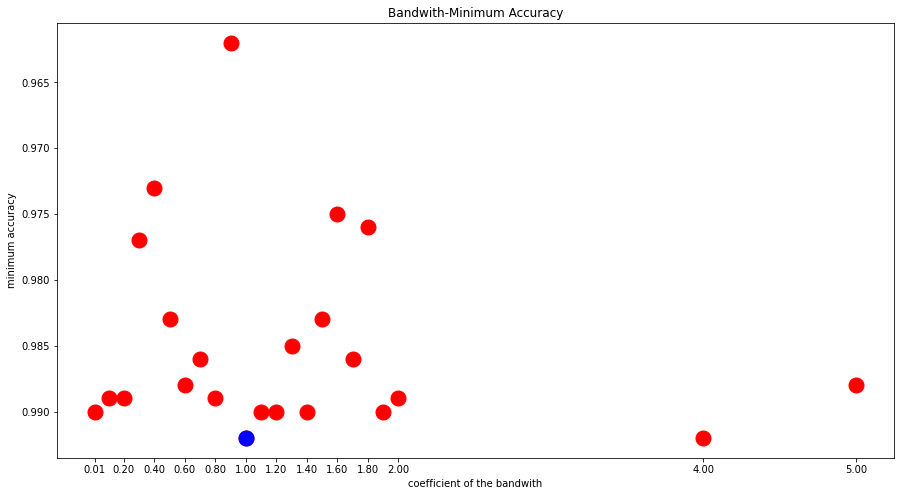

In [106]:
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(111)

plt.plot(a[:, 0], a[:, 1], "ro", markersize=15)
ax.set_xticks([0.01, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 4, 5])

plt.plot(1, original , "bo", markersize=15)
# plt.legend(["Dataset 1", "Dataset 2"])
plt.gca().invert_yaxis()
plt.title("Bandwith-Minimum Accuracy")
plt.xlabel("coefficient of the bandwith")
plt.ylabel("minimum accuracy")

plt.savefig("bandwith_experiments.png")

In [63]:
original

0.992